**Note: This section is still in a draft form.**

## Section 5: A Combined Approach

* We take the tartans from Section 3.

In [17]:
from tartans import tartans

* And the quantum island from Section 4 (which itself used the island from Section 1).

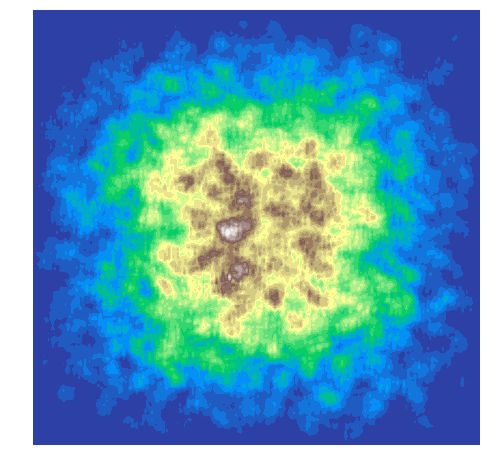

In [18]:
from quantum_island import quantum_island

from tools import plot_height
plot_height(quantum_island)

* As well as a drop of randomness.

In [19]:
import random

* We will now combine these to bring the island into 3D.
* This is done by the following function, which builds terrain that can be used in the [Minetest](https://www.minetest.net/) game engine.
* Specifically, it can be used in conjunction with the [csv2terrain](https://github.com/quantumjim/csv2terrain/blob/master/README.md) mod for Minetest.
* The function turns the terrain into a csv file, which specifies what type of block needs to go at what coordinate in order to create the island.
* A wall is placed around the island, decorated with the rune-based tartans.


In [28]:
def make_blocks(height,tartans,depth,terrain = {'sea':2/16,'beach':3/16,'grass':5/16,'forest':12/16,'rock':14/16},origin=(0,0,0),filename='blocks.csv'):
    
    def in_band(h,this_band):
        return (h>=this_band[0]) and (h<this_band[1])
    
    def add_grass(blocks,x,h,y,r,p=1):
        if r<0.25*p:
            blocks[x,H,y] = 'fern_1' 
        elif r<0.5*p:
            blocks[x,H,y] = 'marram_grass_1'
        elif r<0.75*p:
            blocks[x,H,y] = 'marram_grass_2'
        elif r<=p:
            blocks[x,H,y] = 'marram_grass_3'
            
    def add_tree(blocks,x,h,y,r):
        for j in range(0,6):
            blocks[x,h+j,y] = 'tree'
        for xx in range(x-3,x+4):
            for yy in range(y-3,y+4):
                for hh in range(h+5,h+11):
                    d = (xx-x)**2+(yy-y)**2+(hh-h-6)**2 + 0.1
                    if d<8:
                        blocks[xx,hh,yy] = 'leaves'
        xx = x+2*(r<0.5)-1
        yy = y+2*(r<0.5)-1
        blocks[xx,h+5,yy] = 'tree'
        blocks[xx,h+4,yy] = 'torch'
            
    
    band = {'sea':[0,terrain['sea']],'beach':[terrain['sea'],terrain['beach']],'grass':[terrain['beach'],terrain['grass']],'forest':[terrain['grass'],terrain['forest']],'rock':[terrain['forest'],terrain['rock']],'peak':[terrain['rock'],1]}
    
    blocks = {}
    
    for (x,y) in height:
        
        blocks[x,0,y] = 'sand'
        
        H = int(height[x,y]*depth)
        r = height[x,y]*depth - H
        
        if in_band(height[x,y],band['sea']):
            for h in range(0,max(H,1)):
                blocks[x,h,y] = 'sand'
            for h in range(max(H,1),int(terrain['sea']*depth)):
                blocks[x,h,y] = 'water_source'
                
        elif in_band(height[x,y],band['beach']):
            for h in range(1,H-2):
                blocks[x,h,y] = 'stone'
            if H>2:
                for h in [H-2,H-1]:
                    blocks[x,h,y] = 'sand'
        
        elif in_band(height[x,y],band['grass']) or in_band(height[x,y],band['forest']):
            for h in range(1,H-2):
                blocks[x,h,y] = 'stone'
            blocks[x,H-2,y] = 'dirt'
            blocks[x,H-1,y] = 'dirt_with_grass'
            if in_band(height[x,y],band['grass']) or r>0.025:
                add_grass(blocks,x,H,y,r)
            else:
                add_tree(blocks,x,H,y,r)
                
        elif in_band(height[x,y],band['rock']):
            for h in range(1,H-2):
                blocks[x,h,y] = 'stone'
            for h in [H-2,H-1]:
                if r<1/6:
                    blocks[x,h,y] = 'stone_with_gold'
                elif r<2/6:
                    blocks[x,h,y] = 'stone_with_iron'
                elif r<3/6:
                    blocks[x,h,y] = 'stone_with_copper'
                else:
                    blocks[x,h,y] = 'stone'
            add_grass(blocks,x,H,y,r,p=0.5)

        elif in_band(height[x,y],band['peak']):
            for h in range(1,H):
                blocks[x,h,y] = 'stone'
        
    size = max(max(height.keys()))+1
    L = max(max(tartans[0]))+1
        
    for x in range(size):
        for y in range(size):
            if (x,0,y) not in blocks:
                blocks[x,0,y] = 'sand'
            if (x,1,y) not in blocks:
                blocks[x,1,y] = 'water_source'
    
    for j in range(0,size,L):
        tartan  = random.choice(tartans)
        for dj in range(L):
            for h in range(L):
                x,y = dj,L-1-h
                blocks[j+dj,h+1,0] = (tartan[x,y]<2/3)*'diamondblock' + (tartan[x,y]>=2/3)*'goldblock'
                blocks[j+dj,h+1,size-1] = (tartan[x,y]<2/3)*'diamondblock' + (tartan[x,y]>=2/3)*'goldblock'
                blocks[0,h+1,j+dj] = (tartan[x,y]<2/3)*'diamondblock' + (tartan[x,y]>=2/3)*'goldblock'
                blocks[size-1,h+1,j+dj] = (tartan[x,y]<2/3)*'diamondblock' + (tartan[x,y]>=2/3)*'goldblock'
            
    for h in range(L):
        tartan  = random.choice(tartans)
        for x in range(L):
            for y in range(L):
                blocks[x-4*(h-(L-1)),h+1,y+size-L+4*(h-(L-1))] = (tartan[x,y]<2/3)*'diamondblock' + (tartan[x,y]>=2/3)*'goldblock'  
                
    for j in range(4*(L-1),int(size/2),4):
        for x in range(L):
            for y in range(L):
                blocks[x+j,1,y+size-L-j] = (tartan[x,y]<2/3)*'diamondblock' + (tartan[x,y]>=2/3)*'goldblock'
                
    with open(filename, 'w') as file:
        file.write( str(origin[0])+','+str(origin[1])+','+str(origin[2])+',min,\n' )
        file.write( str(origin[0]+size)+','+str(origin[1]+depth+1)+','+str(origin[2]+size-1)+',max,\n' )
        file.write( str(origin[0]+1)+','+str(origin[1]+h+2)+','+str(origin[2]+size-2)+',player,\n' )
        for (x,h,y) in blocks:
            if h>=0 and x>=0 and y>=0 and x<=size and y<=size:
                file.write( str(x+origin[0])+','+str(h+origin[1])+','+str(y+origin[2])+','+blocks[x,h,y]+',\n' )

* We will implement this with a height of 20 blocks for the island.
* The coordinates of the origin are chosen so that the island can also be created in [QiskitBlocks](https://github.com/JavaFXpert/QiskitBlocks/blob/master/README.md).

In [29]:
size = max(max(quantum_island.keys()))
height = 20
make_blocks(quantum_island,tartans,height,origin=(600-size,0,370-size))

That's all for now!